In [1]:
#import packages 
import sklearn
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#Load dataset

DIRECTORY_WHERE_THIS_FILE_IS = os.path.dirname(os.path.abspath("ml_stacking.md"))
DATA_PATH = os.path.join(DIRECTORY_WHERE_THIS_FILE_IS, "data/prepared_dataset.csv")
df1 = pd.read_csv(DATA_PATH)





In [8]:
print(df1.shape)
print(df1.head())

#drop the index 
df1 = df1.drop("Unnamed: 0", axis = 1)

(46530, 23)
   Unnamed: 0 provincia_iso       fecha  num_casos_x  num_casos_prueba_pcr  \
0         330            CE  2020-02-01            0                     0   
1         331            CE  2020-02-01            0                     0   
2         332            CE  2020-02-01            0                     0   
3         333            CE  2020-02-01            0                     0   
4         334            CE  2020-02-01            0                     0   

   num_casos_prueba_test_ac  num_casos_prueba_ag  num_casos_prueba_elisa  \
0                         0                    0                       0   
1                         0                    0                       0   
2                         0                    0                       0   
3                         0                    0                       0   
4                         0                    0                       0   

   num_casos_prueba_desconocida sexo  ... num_uci  num_def  \


In [13]:
#some insights
print("number of provinces: {}".format(df1['provincia'].nunique()))
print(df1.describe())

number of provinces: ['\xa0Ceuta' '\xa0Melilla' 'Navarra']
        num_casos_x  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
count  46530.000000          46530.000000              46530.000000   
mean      25.089620             17.192779                  0.005158   
std       35.517003             30.534740                  0.071634   
min        0.000000              0.000000                  0.000000   
25%        1.000000              0.000000                  0.000000   
50%       12.000000              5.000000                  0.000000   
75%       31.000000             16.000000                  0.000000   
max      227.000000            216.000000                  1.000000   

       num_casos_prueba_ag  num_casos_prueba_elisa  \
count         46530.000000            46530.000000   
mean              7.756931                0.049001   
std              12.301038                0.321464   
min               0.000000                0.000000   
25%               0.000000     

In [248]:
print(df1.head(2))
print('')
print(df2.head(2))
print('')
print(df3.head(2))
print('')
print(df4.head(2))
print('')
print(df5.head(2))

      id   jets
0  12919  bijet
1  12920  bijet

      id       MR       Rsq       E1      Px1       Py1      Pz1       E2  \
0  15539  413.358  0.007247  303.461  129.245  -88.8368  259.134  162.125   
1  17007  433.400  0.012239  586.030 -158.880 -156.0780  541.144  293.401   

       Px2       Py2       Pz2       HT       MET  nBJets  
0 -139.862   58.7003  -50.8416  308.513   7.95099       0  
1  131.908  133.0470  205.1340  421.112  10.32080       0  

      id     Run  Lumi       Event
0  12919  149181  1803  1702389655
1  12920  148029   394   307432007

     id       MR       Rsq       E1        Px1       Py1      Pz1        E2  \
0  2389  628.650  0.003689  344.471    1.97683 -106.3260  258.073  355.6340   
1  9073  238.291  0.018975  270.023  101.12500   46.4665 -245.698   94.0115   

        Px2       Py2       Pz2       HT      MET  nBJets  
0   5.65705  88.32750 -344.2000  211.617  13.6530       0  
1 -87.19800  -9.75658  -25.6827  199.032  10.4786       0  

   id     Run

In [249]:
df8 = df4.merge(df5,on = "id", how = "left")
df9 =  df2.merge(df3,on = "id", how = "left")

In [250]:
print(df8.head())
print('')
df9.head(2)

      id        MR       Rsq       E1        Px1       Py1      Pz1        E2  \
0   2389   628.650  0.003689  344.471    1.97683 -106.3260  258.073  355.6340   
1   9073   238.291  0.018975  270.023  101.12500   46.4665 -245.698   94.0115   
2   7406  1047.610  0.002073      NaN  -57.70030   47.2421  425.894  635.2590   
3   2171   227.925  0.002685  155.943 -102.58900   -5.2552  116.311  112.2300   
4  12189   207.339  0.039911  158.584  -84.84940   71.5817 -112.407  222.8720   

         Px2       Py2        Pz2       HT       MET  nBJets     Run  Lumi  \
0    5.65705  88.32750 -344.20000  211.617  13.65300       0  148029   389   
1  -87.19800  -9.75658  -25.68270  199.032  10.47860       0  148029   390   
2   70.86140 -20.33610 -630.79900  226.173  25.82460       0  147926   463   
3  102.59800   4.14457    4.48955  206.631   1.36038       0  149181  1802   
4   26.13380 -78.36290 -206.39200  193.617  14.76390       0  149181   999   

        Event    jets  
0   303441833  trije

,id,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets,Run,Lumi,Event
0,15539,413.358,0.007247,303.461,129.245,-88.8368,259.134,162.125,-139.862,58.7003,-50.8416,308.513,7.95099,0,149181,1802,1701761326
1,17007,433.400,0.012239,586.030,-158.880,-156.0780,541.144,293.401,131.908,133.0470,205.1340,421.112,10.32080,0,149181,1788,1691004708


['trijet' 'bijet' 'tetrajet']


(array([3722.,    0.,    0.,    0.,    0., 8401.,    0.,    0.,    0.,
         795.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

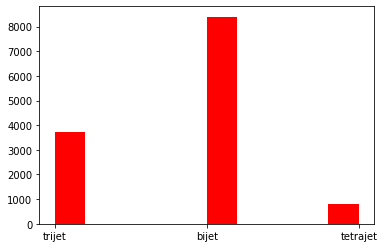

In [251]:
print(df8["jets"].unique())
plt.hist(x=df8["jets"],color = "red")

In [252]:
#preprocessin: dumifying 


In [253]:
#df8 = pd.get_dummies(df8, columns=[''], prefix = '',drop_first=True)

In [254]:
#Null values 
MR = df8['MR'].mean()
e1 = df8['E1'].mean()

In [255]:
print(df8.isna().sum())
#replace with mean
df8['MR'] = df8['MR'].replace("",0.0).fillna(MR)
df9['MR'] = df9['MR'].replace("",0.0).fillna(MR)

df8['E1'] = df8['E1'].replace("",0.0).fillna(e1)
df9['E1'] = df9['E1'].replace("",0.0).fillna(e1)

id           0
MR        2583
Rsq          0
E1        1291
Px1          0
Py1          0
Pz1          0
E2           0
Px2          0
Py2          0
Pz2          0
HT           0
MET          0
nBJets       0
Run          0
Lumi         0
Event        0
jets         0
dtype: int64


In [256]:
pd.set_option('display.max_columns', None)
df8.head()

,id,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets,Run,Lumi,Event,jets
0,2389,628.650,0.003689,344.471000,1.97683,-106.3260,258.073,355.6340,5.65705,88.32750,-344.20000,211.617,13.65300,0,148029,389,303441833,trijet
1,9073,238.291,0.018975,270.023000,101.12500,46.4665,-245.698,94.0115,-87.19800,-9.75658,-25.68270,199.032,10.47860,0,148029,390,304165218,bijet
2,7406,1047.610,0.002073,293.569329,-57.70030,47.2421,425.894,635.2590,70.86140,-20.33610,-630.79900,226.173,25.82460,0,147926,463,498538334,trijet
3,2171,227.925,0.002685,155.943000,-102.58900,-5.2552,116.311,112.2300,102.59800,4.14457,4.48955,206.631,1.36038,0,149181,1802,1701550882,trijet
4,12189,207.339,0.039911,158.584000,-84.84940,71.5817,-112.407,222.8720,26.13380,-78.36290,-206.39200,193.617,14.76390,0,149181,999,983812818,bijet


## Machine learning

### Split the dataset

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
y = df8["jets"]
X = df8.loc[:,df8.columns != "jets"]

In [259]:
#scale 
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

In [260]:
#remove correlated features
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features = get_correlation(X, 0.70)
print('correlated features: ', len(set(corr_features)) )
corr_features

correlated features:  4


{8, 9, 15, 16}

In [261]:
X = X.drop(labels=corr_features, axis = 1)

In [262]:
#train test
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=42)

In [263]:
X

,0,1,2,3,4,5,6,7,10,11,12,13,14
0,-1.091549,1.653609e+00,-0.848858,2.426353e-01,0.029613,-1.186492,0.796386,0.385235,-1.066611,-0.379469,-0.210351,-0.230168,-1.069832
1,0.700838,-6.452241e-01,-0.193342,-1.122394e-01,1.123036,0.507703,-0.695177,-0.874038,-0.075723,-0.548551,-0.503033,-0.230168,-1.069832
2,0.253814,4.120875e+00,-0.918160,5.419162e-16,-0.628517,0.516303,1.293270,1.731160,-1.958203,-0.183907,0.911880,-0.230168,-1.242692
3,-1.150008,-7.062698e-01,-0.891927,-6.560297e-01,-1.123558,-0.065798,0.376658,-0.786347,0.018141,-0.446457,-1.343740,-0.230168,0.863517
4,1.536427,-8.275012e-01,0.704445,-6.434407e-01,-0.927922,0.786186,-0.300530,-0.253791,-0.637898,-0.621303,-0.107925,-0.230168,0.863517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12913,1.125873,-1.057868e+00,-0.278391,-9.660097e-01,-0.584522,-0.768905,-0.026566,-0.914185,-0.083908,-0.966413,-0.932717,-0.230168,-1.069832
12914,-0.240943,7.362076e+00,-0.647702,6.900773e+00,1.075159,2.762928,-5.061174,0.588295,1.028131,2.901431,5.919321,-0.230168,0.863517
12915,-0.439382,-6.533039e-01,-0.796812,1.099262e+00,-0.106997,1.210635,1.548843,-0.249536,0.614199,-0.315719,-1.239332,-0.230168,0.863517
12916,0.942451,-3.347523e-16,-0.016395,-9.130097e-01,-0.702312,-0.690018,-0.110922,-0.925295,0.022541,-0.921364,-0.612663,-0.230168,0.863517


#### Prepare submission table

In [264]:
df9 = df9.sort_values(by='id')
df9

scaler = StandardScaler().fit(df9)
df9 = scaler.transform(df9)
df9 = pd.DataFrame(df9)
#corr_features = get_correlation(X, 0.70)
df9 = df9.drop(labels = corr_features, axis = 1)
df9

,0,1,2,3,4,5,6,7,10,11,12,13,14
0,-1.731850,-0.697518,-0.167640,-0.171249,-0.581469,1.104820,-0.669287,1.503342,-1.793795,-0.479470,-0.608323,-0.220416,0.865000
1,-1.731448,-0.101973,-0.709532,-0.420356,-0.597844,-0.334230,0.588986,-0.383472,-0.390323,-0.459809,1.027090,-0.220416,-1.066805
2,-1.731045,-0.015674,0.507675,-0.531871,-1.549290,-0.161008,0.342660,0.958600,1.469627,-0.405695,0.496936,-0.220416,0.865000
3,-1.730643,-0.015674,0.379333,-0.936137,0.945176,0.296746,0.060789,-0.465485,0.532010,-1.017652,0.046123,-0.220416,0.865000
4,-1.730241,-0.015674,-0.810234,-0.021416,1.103679,-0.146732,0.950264,0.245515,-0.686853,0.779412,-0.311141,-0.220416,-1.066805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,1.730241,-0.015674,-0.357565,-0.021416,-0.534257,0.985329,1.716999,0.969255,1.468180,-0.749120,-1.004593,-0.220416,0.865000
8609,1.730643,-0.015674,-0.601903,-0.986972,-0.749949,0.027110,-0.137560,-0.266536,0.673678,-1.436104,-0.670692,-0.220416,-1.066805
8610,1.731045,-0.791700,-0.243027,-0.799202,0.461184,-1.167441,0.156743,-0.747276,0.219992,-0.321878,-0.832090,4.153875,-1.239528
8611,1.731448,-0.758430,-0.060072,-0.021416,-0.819223,0.919619,0.860172,-1.019972,0.058227,-0.839004,-0.564025,-0.220416,-1.066805


## Create dataset for weak learners

In [265]:
weak_leaner = pd.DataFrame()

In [266]:
#weak_leaner['targetTRUE'] = df10['jets']
#weak_leaner['ra'] = X_test['ra']
weak_leaner.shape

(0, 0)

In [267]:
weak_leaner.head()

""


## Random forest 

In [268]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV





random_grid = {'n_estimators': [200,300,500,800,1300,1500],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,30,50,80],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
rf_random.best_params_

Fitting 2 folds for each of 5 candidates, totalling 10 fits


{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80}

'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80}

In [269]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 500,min_samples_split = 10,
 min_samples_leaf= 1,
 max_features = 'sqrt',
 max_depth = 80)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7538699690402477


In [270]:
weak_leaner['targetrandomF'] = y_pred

In [271]:
df1['jets'] = weak_leaner['targetrandomF']

## Ridge regression

In [272]:
from sklearn.linear_model import LogisticRegression

In [273]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.6617647058823529


In [274]:
weak_leaner['targetridge'] = y_pred

## SVM 

In [275]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv = 3)
  
#### fitting the model for grid search
grid.fit(X_train, y_train)
grid.best_params_

In [276]:
csvm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
csvm.fit(X_train, y_train)


y_pred = csvm.predict(X_test)

print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.7360681114551083


In [277]:
weak_leaner['targetsvm'] = y_pred

In [278]:
df1['jets'] = weak_leaner['targetsvm']

## Nearest neighbor

In [279]:
from sklearn.neighbors import NearestCentroid
neigh = NearestCentroid()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.6110681114551083


In [280]:
weak_leaner['targetneigh'] = y_pred

## PCA LDA 

In [281]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [282]:
X.columns.nunique()

13

In [283]:
pca = PCA(n_components=13) #covariant Matrix
x_pca = pca.fit_transform(X)
df_pca =  pca.fit_transform(df9)
variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)

[ 15.6  28.1  36.6  44.8  52.6  60.3  68.   75.5  83.   90.   94.8  98.6
 100.2]


In [284]:
x_pca = pd.DataFrame(x_pca)
x_pca = x_pca.drop(labels = [0,1,2,3,4,5], axis = 1)


In [285]:
df_pca  = pd.DataFrame(df_pca)
df_pca = df_pca.drop(labels = [0,1,2,3,4,5], axis = 1)

In [286]:
#train test
X_train, X_test, y_train, y_test = train_test_split(
   x_pca, y, test_size=0.20, random_state=42)

In [287]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [288]:
y_pred = model.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#weak_leaner['targetlda'] = y_pred

ACCURACY OF THE MODEL:  0.6408668730650154


## Strong learners

In [289]:
#data 
weak_leaner.head()

,targetrandomF,targetridge,targetsvm,targetneigh
0,bijet,bijet,bijet,tetrajet
1,trijet,trijet,trijet,tetrajet
2,trijet,trijet,trijet,tetrajet
3,bijet,bijet,bijet,bijet
4,bijet,bijet,bijet,trijet


In [290]:
weak_leaner = pd.get_dummies(weak_leaner, columns=['targetrandomF','targetridge',
                                                   'targetneigh','targetsvm'], prefix = ['random_','ridge_','neigh_','svm_']
                             ,drop_first=True)


In [291]:
weak_leaner

,random__tetrajet,random__trijet,ridge__tetrajet,ridge__trijet,neigh__tetrajet,neigh__trijet,svm__tetrajet,svm__trijet
0,0,0,0,0,1,0,0,0
1,0,1,0,1,1,0,0,1
2,0,1,0,1,1,0,0,1
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2579,0,0,0,0,0,0,0,0
2580,0,1,0,0,0,0,0,1
2581,0,1,0,1,1,0,0,1
2582,0,1,0,0,0,1,0,1


In [292]:
y = weak_leaner["targetTRUE"]
X = weak_leaner.loc[:,weak_leaner.columns != "targetTRUE"]

KeyError: 'targetTRUE'

In [ ]:
#train test
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.40, random_state=42)

## AdaBoost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
boost = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5,max_depth=50, random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = boost.predict(X_test)

print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

## Neural network

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(5, 2), random_state=1, max_iter=150)
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
weak_leaner['targetnn'] = y_pred
df1['jets'] = weak_leaner['targetnn']

# Submit

In [ ]:
df1.to_csv('submit7.csv',index=False,header = True)